In [ ]:
#KNN Algorithm

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_icici=pd.read_csv("/content/drive/MyDrive/Python Colab Stuff Sem 3/Daily datasets for ML/ICICIBANK_day_data.csv")
print(df_icici)

      Unnamed: 0                       date   close    high     low    open  \
0              0  2015-01-01 00:00:00+05:30  320.27  321.32  318.36  320.64   
1              1  2015-01-02 00:00:00+05:30  329.36  330.45  320.00  320.00   
2              2  2015-01-05 00:00:00+05:30  330.05  334.00  328.64  332.09   
3              3  2015-01-06 00:00:00+05:30  316.05  327.18  314.73  326.73   
4              4  2015-01-07 00:00:00+05:30  307.50  314.77  304.95  314.18   
...          ...                        ...     ...     ...     ...     ...   
1902        1902  2022-10-17 00:00:00+05:30  885.20  887.50  868.55  872.00   
1903        1903  2022-10-18 00:00:00+05:30  896.90  900.70  891.15  896.05   
1904        1904  2022-10-19 00:00:00+05:30  892.10  900.65  885.55  900.05   
1905        1905  2022-10-20 00:00:00+05:30  888.65  893.30  880.10  889.70   
1906        1906  2022-10-21 00:00:00+05:30  907.15  910.00  885.70  888.00   

        volume  
0      2583281  
1      8272990  


In [ ]:
corr=df_icici.corr()
print(corr)

            Unnamed: 0     close      high       low      open    volume
Unnamed: 0    1.000000  0.878175  0.879954  0.876247  0.877853  0.083036
close         0.878175  1.000000  0.999715  0.999663  0.999263 -0.114538
high          0.879954  0.999715  1.000000  0.999515  0.999577 -0.107142
low           0.876247  0.999663  0.999515  1.000000  0.999656 -0.125195
open          0.877853  0.999263  0.999577  0.999656  1.000000 -0.119238
volume        0.083036 -0.114538 -0.107142 -0.125195 -0.119238  1.000000


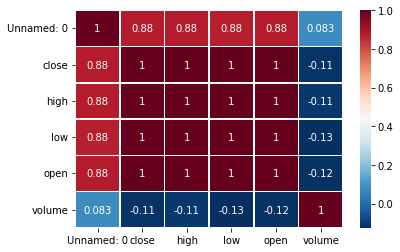

In [ ]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
df2_icici = df_icici['close']
print(df2_icici.head())
df2_icici = pd.DataFrame(df2_icici)  
df2_icici.head()
future_days = 90
df2_icici['Prediction'] = df2_icici['close'].shift(-future_days)
print(df2_icici.tail())
# independent variable
x = np.array(df2_icici.drop(['Prediction'], 1))[:-future_days]
print("array df2 for close values till the start of 'n' future hours after dropping prediction column and ")
print(x)
# dependent variable 
y = np.array(df2_icici['Prediction'])[:-future_days]
print()
print(y)

0    320.27
1    329.36
2    330.05
3    316.05
4    307.50
Name: close, dtype: float64
       close  Prediction
1902  885.20         NaN
1903  896.90         NaN
1904  892.10         NaN
1905  888.65         NaN
1906  907.15         NaN
array df2 for close values till the start of 'n' future hours after dropping prediction column and 
[[320.27]
 [329.36]
 [330.05]
 ...
 [732.75]
 [720.  ]
 [688.  ]]

[287.5  286.68 289.77 ... 892.1  888.65 907.15]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5,metric = 'minkowski',p = 2)
knn_model=knn_regressor.fit(x_train,y_train)
knn_confidence = knn_model.score(x_train,y_train)
print(knn_confidence)

0.9225184620290735


In [ ]:
x_future = np.array(df2_icici.drop(['Prediction'], 1)) [-future_days:]
print(x_future)

[[685.5 ]
 [687.25]
 [678.5 ]
 [686.85]
 [685.95]
 [696.1 ]
 [686.6 ]
 [699.15]
 [713.45]
 [717.35]
 [710.3 ]
 [702.75]
 [707.2 ]
 [703.9 ]
 [720.1 ]
 [719.45]
 [725.95]
 [742.  ]
 [755.7 ]
 [769.5 ]
 [759.9 ]
 [753.2 ]
 [752.4 ]
 [751.2 ]
 [772.  ]
 [780.65]
 [783.1 ]
 [786.  ]
 [800.05]
 [800.9 ]
 [796.3 ]
 [800.5 ]
 [814.6 ]
 [818.6 ]
 [823.4 ]
 [817.75]
 [824.8 ]
 [820.25]
 [838.2 ]
 [836.95]
 [848.75]
 [859.7 ]
 [874.4 ]
 [879.25]
 [883.25]
 [885.1 ]
 [870.4 ]
 [852.25]
 [863.9 ]
 [873.3 ]
 [872.35]
 [870.85]
 [855.85]
 [887.3 ]
 [874.35]
 [872.4 ]
 [882.45]
 [883.65]
 [876.2 ]
 [898.8 ]
 [901.25]
 [907.2 ]
 [910.  ]
 [918.1 ]
 [917.6 ]
 [909.1 ]
 [899.2 ]
 [916.75]
 [915.25]
 [903.4 ]
 [882.25]
 [861.05]
 [852.55]
 [849.5 ]
 [843.9 ]
 [862.  ]
 [848.35]
 [867.65]
 [885.45]
 [882.55]
 [881.75]
 [870.6 ]
 [868.35]
 [853.6 ]
 [870.25]
 [885.2 ]
 [896.9 ]
 [892.1 ]
 [888.65]
 [907.15]]


In [ ]:
y_knn_pred = knn_model.predict(x_future)
print(y_knn_pred)

[805.29 805.29 729.71 805.29 805.29 774.51 805.29 788.38 798.82 799.25
 822.48 752.29 809.91 763.09 820.61 821.04 813.53 835.59 761.07 741.15
 814.97 763.66 760.89 727.   741.15 703.81 703.81 698.78 703.47 703.47
 716.57 703.47 707.71 720.24 710.57 720.24 710.57 720.24 706.55 706.55
 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55
 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55
 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55
 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55
 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55 706.55]


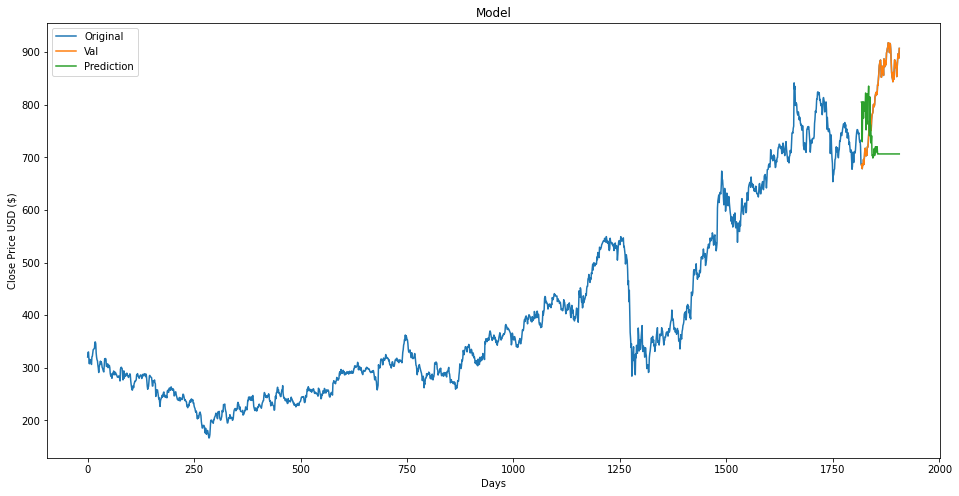

In [ ]:
prediction = y_knn_pred
valid = df2_icici[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_icici[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

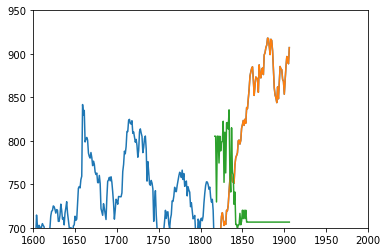

In [ ]:
plt.plot(df_icici['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1600, 2000)
plt.ylim(700, 950)
plt.show()

In [ ]:
#SVM Algorithm

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_future)

In [ ]:
import sklearn
import math
from sklearn.metrics import r2_score
print("The predicted values of close for the next 'n' days")
print(y_svm_pred)
print("The Score is : " , r2_score(x_train,y_train))

The predicted values of close for the next 'n' days
[ 754.87209359  756.81836907  747.0869917   756.3735061   755.37256443
  766.6609622   756.09546674  770.05304231  785.95689333  790.29430725
  782.45359748  774.05680899  779.00590949  775.33579002  793.35274014
  792.62983782  799.85886101  817.7089875   832.94554408  848.2933164
  837.61660521  830.16515054  829.27542462  827.94083572  851.07370994
  860.69387159  863.41865723  866.64391374  882.26972542  883.21505922
  878.09913511  882.77019626  898.45161579  902.90024546  908.23860104
  901.95491165  909.79562142  904.73530519  924.69853076  923.308334
  936.4317915   948.60991518  964.95862918  970.35259263  974.80122229
  976.85871352  960.50999953  940.32434244  953.28097633  963.73525602
  962.67870648  961.01047035  944.32810913  979.30545983  964.90302129
  962.73431433  973.91149636  975.24608526  966.96051252  992.09527008
  994.82005575 1001.43739237 1004.55143313 1013.55990817 1013.00382947
 1003.55049146  992.54013305

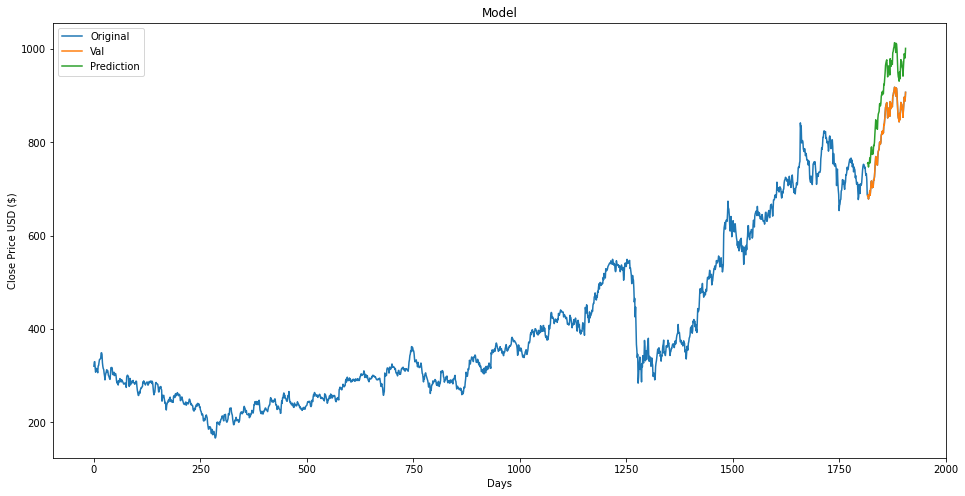

In [ ]:
prediction = y_svm_pred
valid = df2_icici[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_icici[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

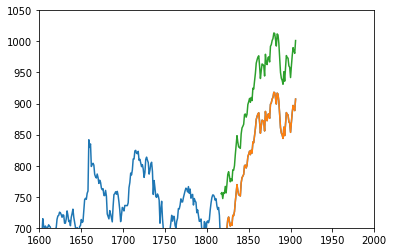

In [ ]:
plt.plot(df_icici['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1600, 2000)
plt.ylim(700, 1050)
plt.show()